In [69]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [73]:
data.drop('Cabin',axis=1,inplace=True)

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

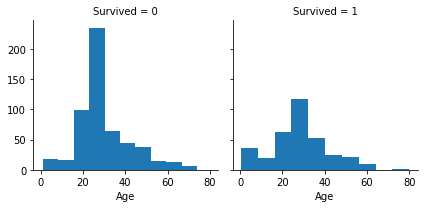

In [75]:
g=sns.FacetGrid(data,col='Survived')
g.map(plt.hist,'Age')

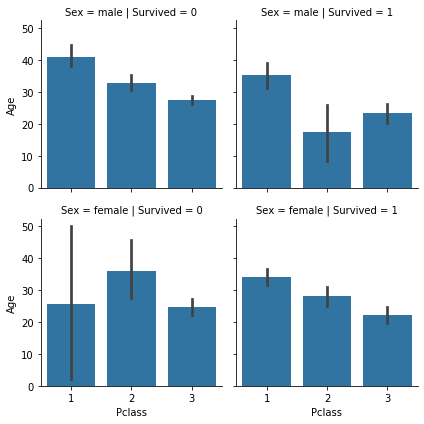

In [76]:
grid=sns.FacetGrid(data,row='Sex',col='Survived')
grid.map(sns.barplot,'Pclass','Age')

In [77]:
data[['Sex','Survived']].groupby('Sex',as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


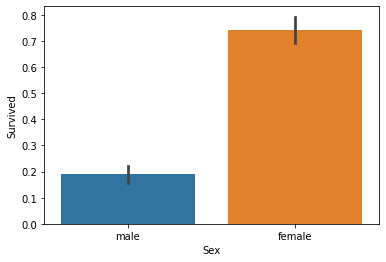

In [78]:
sns.barplot(x = 'Sex', y='Survived', data = data, estimator = my_mean)

In [79]:
data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [80]:
def my_mean(test):
    somme = 0
    nbr = 0
    for elm in test:
        somme = somme + elm
        nbr = nbr + 1
    return somme/nbr

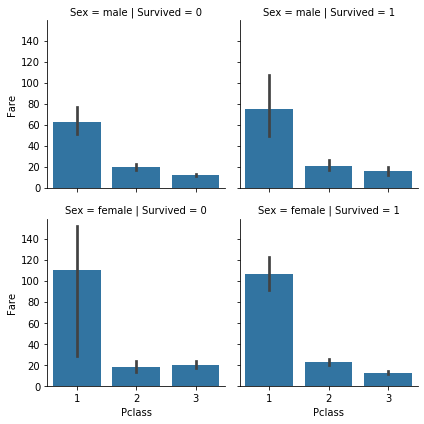

In [81]:
grid=sns.FacetGrid(data,row='Sex',col='Survived')
grid.map(sns.barplot,'Pclass','Fare')

In [82]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    bottom, top = ax.get_ylim()
    
    ax.set_ylim(bottom + 0.5, top - 0.5)

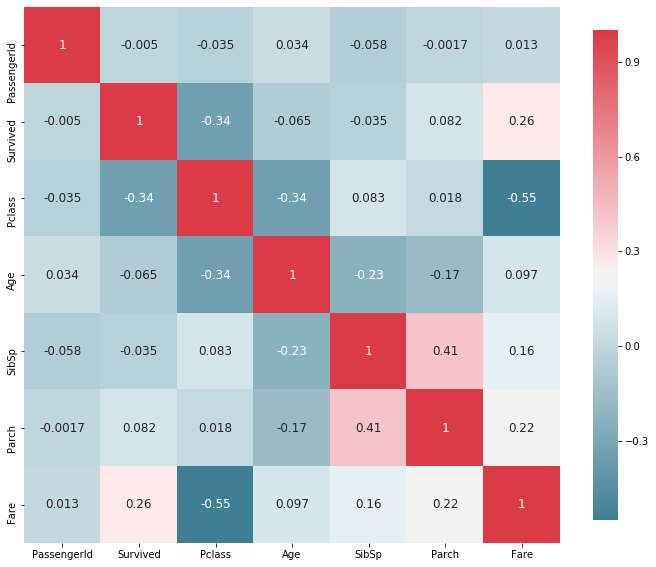

In [83]:
plot_correlation_map(data)

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Analyse
#### according to this graph we notice that there is a strong correlation between sex and survivor and fare and survivor and pclass and susrvived

In [85]:
data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [86]:
data.drop('PassengerId',axis=1,inplace=True)
data.drop('Embarked',axis=1,inplace=True)

In [87]:
data.drop('Ticket',axis=1,inplace=True)

In [88]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [89]:
ch = 'Braund, Mr. Owen Harris'
step1 = ['Braund', ' Mr. Owen Harris']
step2 = ' Mr. Owen Harris'
step3 = ['', 'Mr.', 'Owen', 'Harris']
final_step = 'Mr.'
title = ch.split(',')[1].split(' ')[1]

In [91]:
if title[-1] == '.':
    title = title[:-1]

In [94]:
data['Title'] = data['Name'].map(lambda x : x.split(',')[1].split(' ')[1].split('.')[0])

In [95]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr


In [102]:

Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",
"Don":"Royalty","Sir":"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss" :"Miss",
"Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master" :"Master"}
data['Title'].replace(Title_Dictionary,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mrs
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mrs
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Officer
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Mrs


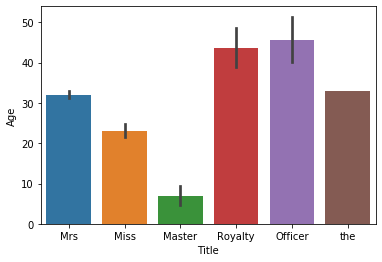

In [108]:
sns.barplot(x = 'Title', y = 'Age', data = data)

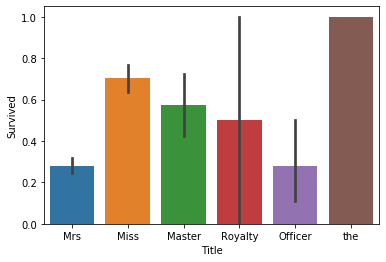

In [109]:
sns.barplot(x = 'Title', y = 'Survived', data = data)

In [110]:
data['FamilySize'] = data['SibSp']+data['Parch']

In [111]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mrs,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mrs,0


In [112]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mrs,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mrs,0
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Mrs,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,Mrs,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,Master,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,Mrs,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,Mrs,1


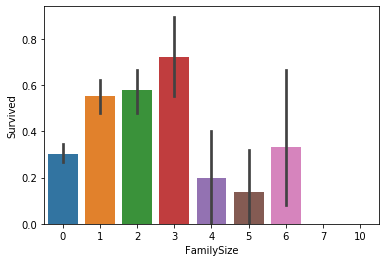

In [113]:
sns.barplot(x = 'FamilySize', y = 'Survived', data = data)